<center>Procesamiento de Texto e Imágenes con deep learning<center>

Sesión 2 - Embeddings

Miguel Ángel Álvarez Carmona
Investigador

SECIHTI - CIMAT Mty

miguel.alvarez@cimat.mx

---

# 🔷 Modelos de lenguaje basados en probabilidad

---

## 📌 ¿Qué es un modelo de lenguaje?

Un **modelo de lenguaje** (Language Model, LM) es una función que asigna una **probabilidad a una secuencia de palabras**.

Formalmente, dada una secuencia de palabras $w_1, w_2, \dots, w_T$, un modelo de lenguaje estima:

$$
P(w_1, w_2, \dots, w_T)
$$

Este tipo de modelos permite:

* Generar texto.
* Corregir errores gramaticales.
* Evaluar la fluidez de una oración.
* Servir como base para tareas como traducción automática, resumen, reconocimiento de voz, etc.

---

## 📏 Probabilidad de una secuencia de palabras

Aplicando la **regla de la cadena**:

$$
P(w_1, w_2, \dots, w_T) = P(w_1) \cdot P(w_2 \mid w_1) \cdot P(w_3 \mid w_1, w_2) \cdots P(w_T \mid w_1, w_2, \dots, w_{T-1})
$$

Este cálculo es **inviable** en la práctica por la explosión combinatoria del espacio de secuencias. Por ello, se hacen **simplificaciones**.

---

## 🔁 Modelos n-grama

Los modelos **n-grama** suponen que la probabilidad de una palabra depende solo de las $n-1$ anteriores:

$$
P(w_T \mid w_1, w_2, \dots, w_{T-1}) \approx P(w_T \mid w_{T-n+1}, \dots, w_{T-1})
$$

Ejemplos:

* **Unigrama** (n = 1): $P(w_T)$
* **Bigrama** (n = 2): $P(w_T \mid w_{T-1})$
* **Trigrama** (n = 3): $P(w_T \mid w_{T-2}, w_{T-1})$

### 📘 Ejemplo:

$$
P(\text{"la casa es blanca"}) \approx P(\text{"la"}) \cdot P(\text{"casa"} \mid \text{"la"}) \cdot P(\text{"es"} \mid \text{"casa"}) \cdot P(\text{"blanca"} \mid \text{"es"})
$$

---

## 🧠 Código: Modelo de bigramas en Python




In [ ]:
import re
from collections import defaultdict, Counter

# Corpus de ejemplo
corpus = """la casa es blanca y la casa es grande.
la casa es resistente.
La casa es blanca y la casa es grande.
La casa es resistente y la casa es fuerte.
La casa es tranquila cuando el sol aparece.
La casa es vieja, pero la casa aún resiste.
La casa tiene un techo rojo y paredes firmes.
La casa tiene una puerta de madera y una ventana azul.
La casa es grande, pero también acogedora.
La casa es blanca y tiene un jardín hermoso.
El jardín de la casa está lleno de flores.
La casa está en una colina y desde allí se ve el valle.
La casa es blanca cuando no llueve y es gris cuando está nublado.
La casa se mantiene firme cuando el viento sopla fuerte.
La casa es un refugio para quienes viven en ella.
La casa protege del frío y resiste el calor del verano.
La casa es blanca, la casa es grande, y la casa es segura.
La casa fue construida con esfuerzo y con materiales sólidos.
La casa se construyó sobre cimientos resistentes.
La casa es vieja, pero la casa no se rompe.
La casa es firme cuando tiembla la tierra.
La casa es un lugar donde se escuchan risas.
La casa es un lugar donde se vive y se sueña.
La casa es más que un lugar: la casa es hogar.
La casa siempre espera a quienes regresan.
La casa es blanca y siempre será blanca.
La casa es grande y siempre será grande.
La casa es hogar.
La casa es casa.
La tierra es fertil
"""

# Preprocesamiento
tokens = re.findall(r'\b\w+\b', corpus.lower())

# Construir bigramas
bigrams = list(zip(tokens[:-1], tokens[1:]))

# Frecuencias
unigram_counts = Counter(tokens)
bigram_counts = Counter(bigrams)

# Probabilidades condicionales
def bigram_prob(w1, w2):
    return bigram_counts[(w1, w2)] / unigram_counts[w1]

# Ejemplo
print("P(casa | la) =", bigram_prob("la", "casa"))
print("P(es | casa) =", bigram_prob("casa", "es"))


print("P(tierra | la) =", bigram_prob("la", "tierra"))
print("P(es | tierra) =", bigram_prob("tierra", "es"))

print("P(tierra | el) =", bigram_prob("el", "tierra"))





P(casa | la) = 0.9487179487179487
P(es | casa) = 0.6842105263157895
P(tierra | la) = 0.05128205128205128
P(es | tierra) = 0.5
P(tierra | el) = 0.0


---

## ⚠️ Limitaciones de los modelos n-grama

### 1. **Sparsity** (dispersión):

Muchas combinaciones posibles de palabras no aparecen en el corpus, lo que lleva a probabilidades cero.

### 2. **Escalabilidad**:

Los modelos con $n > 3$ crecen exponencialmente en requerimientos de memoria y datos para estimar adecuadamente.

### 3. **Pérdida de contexto largo**:

No se captura dependencia de largo alcance (por ejemplo, sujeto-verbo en diferentes oraciones).

---

## 🧪 Evaluación: Perplejidad

La **perplejidad** mide qué tan bien un modelo predice un corpus. Se define como:

$$
\text{PP}(W) = P(w_1, w_2, \dots, w_T)^{-\frac{1}{T}} = \exp \left( -\frac{1}{T} \sum_{t=1}^T \log P(w_t \mid w_{t-n+1}, \dots, w_{t-1}) \right)
$$

Donde:

* $T$ es el número de tokens en el corpus.
* $P(w_t \mid \cdot)$ es la probabilidad condicional estimada por el modelo.

### Interpretación:

* Perplejidad baja → mejor modelo.
* Perplejidad alta → el modelo "se sorprende" más con los datos.

---

### 📘 Código: Cálculo de perplejidad para bigramas




In [ ]:
import math

def calculate_perplexity(tokens, bigram_counts, unigram_counts):
    log_prob = 0
    N = len(tokens) - 1
    for i in range(1, len(tokens)):
        w1, w2 = tokens[i-1], tokens[i]
        prob = bigram_counts.get((w1, w2), 1e-6) / unigram_counts.get(w1, 1)
        log_prob += math.log(prob)
    return math.exp(-log_prob / N)

# Evaluar el modelo
pp = calculate_perplexity(tokens, bigram_counts, unigram_counts)
print("Perplejidad del modelo de bigramas:", pp)



Perplejidad del modelo de bigramas: 2.436734250971542


---

## 📌 Resumen

| Concepto           | Descripción                                             |
| ------------------ | ------------------------------------------------------- |
| Modelo de lenguaje | Asigna una probabilidad a una secuencia de palabras     |
| Regla de la cadena | Descompone la probabilidad conjunta en condicionales    |
| Modelo n-grama     | Aproximación que usa solo $n-1$ palabras previas        |
| Sparsity           | Combinaciones ausentes generan probabilidad 0           |
| Perplejidad        | Mide qué tan “sorprendido” está el modelo por un corpus |

---


# 🔷 De n-gramas a representaciones distribuidas

## 📌 Motivación: La necesidad de capturar el significado

Los modelos de lenguaje basados en n-gramas representan las palabras y sus combinaciones **como secuencias simbólicas**. Estas representaciones son **esparsas**, **discretas** y **no generalizan** bien entre palabras similares.

Por ejemplo:

* Los vectores de `gato`, `felino` y `perro` no tendrán nada en común si no aparecen en contextos idénticos.
* Las representaciones **one-hot** solo indican identidad, no similitud.

Esto limita:

* La **capacidad de generalización**.
* El **almacenamiento y eficiencia computacional**.
* El uso en tareas semánticas como inferencia, resumen o traducción.

---

## 📚 Limitaciones de las representaciones esparsas

Supongamos un vocabulario de tamaño $V = 50{,}000$. Una palabra representada como un vector **one-hot** será:

$$
\mathbf{w}_i = [0, 0, \dots, 1, \dots, 0] \in \mathbb{R}^{50{,}000}
$$

Estas representaciones tienen varios problemas:

* **Altamente esparsas:** solo una entrada es 1.
* **No capturan relaciones semánticas.**
* **Memoria costosa** y no escalables para modelos grandes.
* **Distancia semántica plana:** la distancia entre cualquier par de palabras diferentes es siempre la misma.

---

## 🧠 Principio de distribución semántica

> “You shall know a word by the company it keeps.”
> – **John Firth (1957)**

Este principio inspira los **métodos de aprendizaje distribuido**, donde una palabra se representa por **su contexto de aparición**.

### 💡 Idea central:

Palabras que **ocurren en contextos similares** tienden a tener **significados similares**.

---

## 🔡 Matriz de coocurrencia

A partir de un corpus, se puede construir una matriz $W \in \mathbb{R}^{V \times V}$ donde:

* Las filas son palabras objetivo.
* Las columnas son palabras de contexto.
* La celda $W_{ij}$ cuenta cuántas veces la palabra $w_j$ aparece en el contexto de $w_i$.

Esta matriz suele ser:

* **Muy grande**.
* **Muy esparsa**.
* Difícil de manejar directamente.

---

## 🔽 Reducción de dimensionalidad: LSA

Para obtener vectores **densos**, se aplica **reducción de dimensionalidad** sobre la matriz de coocurrencia. Por ejemplo:

### 🔢 Descomposición SVD:

$$
\mathbf{W} \approx \mathbf{U}_k \Sigma_k \mathbf{V}_k^\top
$$

Donde:

* $\mathbf{U}_k$ y $\mathbf{V}_k$: matrices ortogonales.
* $\Sigma_k$: matriz diagonal con los $k$ valores singulares más grandes.

Cada fila de $\mathbf{U}_k \Sigma_k$ representa una palabra en un espacio semántico de **k dimensiones**.

Este enfoque se conoce como **Latent Semantic Analysis (LSA)**.

---



In [ ]:
# -*- coding: utf-8 -*-
from collections import Counter
import re
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity


# -----------------------------
# 1) Preprocesamiento y vocabulario
# -----------------------------
def tokenize(texto):
    """
    Tokenización muy simple: minúsculas y palabras alfanuméricas (incluye tildes).
    Ajusta esta función a tus necesidades.
    """
    return re.findall(r"\b\w+\b", texto.lower(), flags=re.UNICODE)

def construir_vocab(corpus_tokens, min_count=1):
    """
    Construye vocabulario a partir de una lista de listas de tokens.
    min_count: frecuencia mínima para incluir palabra en el vocabulario.
    """
    freqs = Counter()
    for tokens in corpus_tokens:
        freqs.update(tokens)
    vocab = [w for w, c in freqs.items() if c >= min_count]
    vocab.sort()  # orden estable
    word2id = {w: i for i, w in enumerate(vocab)}
    return vocab, word2id

In [ ]:
# -----------------------------
# 2) Matriz de coocurrencia W
# -----------------------------
def matriz_coocurrencia(corpus, window_size=2, min_count=1, directed=True):
    """
    Construye la matriz W (palabra objetivo x palabra contexto).
    - window_size: tamaño de la ventana simétrica alrededor del target.
    - directed=True: solo cuenta (i -> j). Si False, también suma (j -> i).
    Devuelve: (W_csr, vocab, word2id)
    """
    # Tokenizar corpus
    corpus_tokens = [tokenize(doc) for doc in corpus]
    # Vocabulario
    vocab, word2id = construir_vocab(corpus_tokens, min_count=min_count)
    V = len(vocab)

    rows, cols, data = [], [], []

    for tokens in corpus_tokens:
        ids = [word2id[w] for w in tokens if w in word2id]
        n = len(ids)
        for i, wi in enumerate(ids):
            # ventana [i-window_size, i+window_size], excluyendo i
            left = max(0, i - window_size)
            right = min(n, i + window_size + 1)
            for j in range(left, right):
                if i == j:
                    continue
                wj = ids[j]
                # cuenta ocurrencia en el contexto
                rows.append(wi)
                cols.append(wj)
                data.append(1.0)
                # si quieres matriz estrictamente simétrica, puedes sumar también el espejo
                if not directed:
                    rows.append(wj)
                    cols.append(wi)
                    data.append(1.0)

    if not rows:
        # corpus vacío o vocabulario filtrado demasiado estricto
        W = csr_matrix((V, V), dtype=np.float64)
    else:
        W = coo_matrix((np.array(data, dtype=np.float64),
                        (np.array(rows), np.array(cols))), shape=(V, V)).tocsr()

    return W, vocab, word2id




In [ ]:
# -----------------------------
# 3) LSA vía SVD truncado
# -----------------------------
def lsa_embeddings(W, k=10, random_state=0):
    """
    Aplica SVD truncado a W:
        W ≈ U_k Σ_k V_k^T
    TruncatedSVD.fit_transform(W) ≈ U_k Σ_k  (embeddings de filas/palabras objetivo)
    Devuelve: X (V x k) con embeddings densos.
    """
    k = min(k, min(W.shape) - 1)  # seguridad
    svd = TruncatedSVD(n_components=k, random_state=random_state)
    X = svd.fit_transform(W)  # U_k Σ_k
    return X, svd




In [ ]:
# -----------------------------
# 4) Utilidades: similitud de palabras
# -----------------------------
def similitud_palabras(palabra, vocab, X, topk=10):
    """
    Devuelve top-k palabras más similares (coseno) a 'palabra'
    usando los embeddings X.
    """
    if palabra not in vocab:
        raise ValueError(f"'{palabra}' no está en el vocabulario.")
    idx = vocab.index(palabra)
    v = X[idx:idx+1]  # (1, k)
    sims = cosine_similarity(v, X).flatten()  # (V,)
    # ordenar por similitud decreciente; ignorar índice de la propia palabra
    orden = np.argsort(-sims)
    vecinos = [(vocab[i], float(sims[i])) for i in orden if i != idx][:topk]
    return vecinos




In [ ]:
# -----------------------------
# 5) Ejemplo de uso
# -----------------------------

# Corpus pequeño de ejemplo (puedes reemplazarlo por el tuyo)
corpus = [
    "el trabajo en equipo mejora el desempeño laboral",
    "un buen entorno organizacional favorece el trabajo",
    "la carga de trabajo excesiva reduce el bienestar",
    "el liderazgo y el apoyo social influyen en el clima laboral",
    "la formación adecuada mejora el desempeño y la productividad",
    "un entorno saludable incrementa la satisfacción y el desempeño"
]

# 1) Construir matriz de coocurrencia
W, vocab, word2id = matriz_coocurrencia(
    corpus,
    window_size=2,   # contexto +/- 2 palabras
    min_count=1,     # no filtrar por frecuencia mínima
    directed=True    # matriz dirigida (objetivo->contexto)
)

print(f"Vocab size: {len(vocab)}")
print(f"Shape W: {W.shape}, nnz: {W.nnz}")  # muy esparsa generalmente

# 2) LSA (SVD truncado) para obtener embeddings densos de dimensión k
k = 5
X, svd = lsa_embeddings(W, k=k)
print(f"Embeddings shape: {X.shape}")  # (V, k)




Vocab size: 30
Shape W: (30, 30), nnz: 144
Embeddings shape: (30, 5)


In [ ]:
import pandas as pd
df_embeddings = pd.DataFrame(
    np.round(X, 3),   # redondeamos a 3 decimales para mayor legibilidad
    index=vocab,      # palabras en filas
    columns=[f"dim_{i+1}" for i in range(X.shape[1])]
)

print("\n=== Embeddings LSA (U_k Σ_k) ===")
print(df_embeddings)


=== Embeddings LSA (U_k Σ_k) ===
                dim_1  dim_2  dim_3  dim_4  dim_5
adecuada        1.060  0.807  0.272 -0.408 -0.607
apoyo           1.204  0.152 -0.196 -0.000 -0.464
bienestar       0.693  0.675 -0.184  0.233  0.022
buen            0.109 -0.081  0.946  0.887 -0.048
carga           0.414  0.034  0.360  0.008 -0.324
clima           0.975  0.400 -0.381  0.325  0.029
de              0.501 -0.061  0.320  0.129 -0.302
desempeño       3.404  1.086  0.090 -0.755 -2.063
el              5.819 -4.724 -0.469  0.279  0.105
en              2.070  0.913 -0.836  0.910 -0.718
entorno         0.253 -0.243  1.851  1.364  0.182
equipo          1.247  0.298 -0.491  0.603 -0.484
excesiva        0.940  0.519 -0.204  0.576 -0.058
favorece        0.891  0.496  0.387  0.994 -0.245
formación       0.520 -0.063  0.363 -0.466 -0.566
incrementa      0.340  0.123  1.353 -0.050 -0.062
influyen        1.036  0.492 -0.470  0.430  0.235
la              1.636 -1.226  1.594 -1.263  0.876
laboral         

In [ ]:
# -------------------------------------------
#    Asignar "tópico" dominante a cada palabra
#    (tópico = dimensión latente con mayor carga)
# -------------------------------------------
# Usamos el embedding U_k Σ_k (X). Tomamos la dimensión con |carga| máxima.
abs_X = np.abs(X)
topic_id = abs_X.argmax(axis=1)  # índice de la dimensión dominante por palabra
max_loading_signed = X[np.arange(X.shape[0]), topic_id]  # carga con signo

df_topics = pd.DataFrame({
    "word": vocab,
    "topic_id": topic_id,
    "loading": max_loading_signed,
    "abs_loading": np.abs(max_loading_signed)
}).sort_values(["topic_id", "abs_loading"], ascending=[True, False]).reset_index(drop=True)

print("\n=== Asignación de palabras a tópicos (dimensión dominante) ===")
print(df_topics.head(20))  # muestra las primeras 20 filas

# -------------------------------------------
#   Resumen: top-N palabras por cada tópico
# -------------------------------------------
TOP_N = 5  # cambia si quieres ver más/menos palabras por tópico
print(f"\n=== Top {TOP_N} palabras por tópico (según |carga| en U_kΣ_k) ===")
for t in range(X.shape[1]):
    sub = df_topics[df_topics["topic_id"] == t].nlargest(TOP_N, "abs_loading")
    palabras = [f"{w} ({c:+.3f})" for w, c in zip(sub["word"], sub["loading"])]
    print(f"Tópico {t+1}: " + ", ".join(palabras))




=== Asignación de palabras a tópicos (dimensión dominante) ===
            word  topic_id   loading  abs_loading
0             el         0  5.818833     5.818833
1              y         0  3.878399     3.878399
2      desempeño         0  3.403587     3.403587
3         mejora         0  2.388319     2.388319
4             en         0  2.069839     2.069839
5        trabajo         0  1.909055     1.909055
6        laboral         0  1.638727     1.638727
7             la         0  1.636241     1.636241
8      liderazgo         0  1.587567     1.587567
9         equipo         0  1.246848     1.246848
10         apoyo         0  1.204285     1.204285
11  satisfacción         0  1.194379     1.194379
12      adecuada         0  1.060387     1.060387
13      influyen         0  1.036413     1.036413
14        social         0  1.036413     1.036413
15         clima         0  0.974821     0.974821
16        reduce         0  0.957821     0.957821
17      excesiva         0  0.939992

In [ ]:
def similitudes_topk(palabra, vocab, X, topk=10):
    """
    Devuelve top-k palabras más similares (coseno) a 'palabra'
    usando los embeddings X.
    """
    consulta = palabra if palabra in vocab else vocab[0]
    vecinos = similitud_palabras(consulta, vocab, X, topk=10)
    print(f"\nPalabras más similares a '{consulta}':")
    for w, s in vecinos:
        print(f"  {w:15s}  cos={s:.3f}")

# 3) Consultar palabras similares
ws = ["desempeño", "trabajo", "liderazgo", "entorno", "productividad", "social", "excesiva"]
for w in ws:
    print(f"\n---\nPalabra: {w}")
    similitudes_topk(w, vocab, X)



---
Palabra: desempeño

Palabras más similares a 'desempeño':
  apoyo            cos=0.944
  adecuada         cos=0.937
  liderazgo        cos=0.908
  satisfacción     cos=0.883
  carga            cos=0.800
  formación        cos=0.798
  en               cos=0.780
  de               cos=0.767
  equipo           cos=0.767
  y                cos=0.702

---
Palabra: trabajo

Palabras más similares a 'trabajo':
  influyen         cos=0.970
  social           cos=0.970
  excesiva         cos=0.962
  clima            cos=0.943
  bienestar        cos=0.921
  reduce           cos=0.919
  laboral          cos=0.891
  en               cos=0.856
  equipo           cos=0.816
  mejora           cos=0.816

---
Palabra: liderazgo

Palabras más similares a 'liderazgo':
  adecuada         cos=0.929
  desempeño        cos=0.908
  bienestar        cos=0.903
  laboral          cos=0.898
  y                cos=0.895
  apoyo            cos=0.884
  clima            cos=0.854
  en               cos=0.852
  e

## 📦 Introducción a Word Embeddings

Los **word embeddings** son representaciones densas y continuas en $\mathbb{R}^d$, donde:

* Palabras **semánticamente similares** están **cerca** en el espacio vectorial.
* Capturan **sintaxis** y **semántica**.
* Se entrenan con grandes corpus usando objetivos predictivos.

### 🔍 Características clave:

* Vectores de tamaño fijo, típicamente $d = 100 \sim 300$.
* Se aprenden por métodos basados en contexto (Skip-Gram, CBOW) o factoración.
* Pueden ser preentrenados y usados en otros modelos.

---

## 🧮 Ejemplo: Generación de embeddings con Gensim



In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt_tab')

# Corpus simple
corpus = [
    # --- Gatos ---
    "El gato se acuesta en la caja más pequeña de la casa",
    "El gato persigue puntos de luz en la pared",
    "El gato trepa al árbol sin ayuda",
    "El gato se acicala con su lengua constantemente",
    "El gato afila sus uñas en el sofá",
    "El gato observa a los pájaros desde la ventana",
    "El gato duerme en lugares altos como repisas y armarios",
    "El gato se esconde en bolsas de papel",
    "El gato se desliza silencioso entre los muebles",
    "El gato ronronea cuando está cómodo",
    "El gato da saltos grandes para alcanzar estantes",
    "El gato bebe agua directamente del grifo",
    "El gato juega con ovillos de lana",
    "El gato camina sobre el teclado del ordenador",
    "El gato se sienta encima de los libros que lees",
    "El gato caza insectos dentro de la casa",
    "El gato se enrosca para dormir en círculos perfectos",
    "El gato mueve la cola cuando está molesto",
    "El gato maúlla frente a la puerta cerrada",
    "El gato derriba objetos de la mesa por diversión",

    # --- Perros ---
    "El perro corre tras la pelota en el parque",
    "El perro ladra al cartero todas las mañanas",
    "El perro mueve la cola cuando ve a su dueño",
    "El perro entierra huesos en el jardín",
    "El perro trae el periódico en la boca",
    "El perro acompaña al dueño en paseos largos",
    "El perro juega en la fuente del parque",
    "El perro protege la casa cuando oye ruidos",
    "El perro nada en el lago con entusiasmo",
    "El perro sigue rastros con su olfato agudo",
    "El perro se sienta cuando escucha la orden",
    "El perro busca palos y los devuelve feliz",
    "El perro ladra de emoción cuando llega alguien",
    "El perro se revuelca en el césped",
    "El perro corre junto a ciclistas en la calle",
    "El perro acompaña a personas ciegas como guía",
    "El perro se emociona al escuchar la correa",
    "El perro ayuda a rescatar personas en emergencias",
    "El perro espera pacientemente la comida de su dueño",
    "El perro se tumba a los pies de la cama por la noche"
]


# Tokenización
tokenized_corpus = [word_tokenize(doc.lower()) for doc in corpus]

# Entrenar modelo Word2Vec
model = Word2Vec(sentences=tokenized_corpus, vector_size=20, window=2, min_count=1, sg=1)

# Obtener vector de una palabra
print("Vector para 'gato':")
print(model.wv['gato'])

# Palabras similares
print("Palabras similares a 'gato':")
print(model.wv.most_similar('gato'))

print("\n---\n")
# Palabras similares
print("Palabras similares a 'perro':")
print(model.wv.most_similar('perro'))

print("\n---\n")
# Palabras similares
print("Palabras similares a 'ladra':")
print(model.wv.most_similar('ladra'))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Vector para 'gato':
[ 0.03542569  0.0250673   0.03583939  0.0051895   0.03118607 -0.01722378
 -0.00510462  0.02956415 -0.03857352 -0.02065608 -0.03635783 -0.00587748
  0.04821566 -0.03761366 -0.01205377 -0.00968536  0.04307564 -0.02992629
 -0.00100189 -0.02466279]
Palabras similares a 'gato':
[('que', 0.5777734518051147), ('persigue', 0.4733923375606537), ('puntos', 0.4660094082355499), ('largos', 0.44907253980636597), ('y', 0.4485686123371124), ('cómodo', 0.4381602704524994), ('directamente', 0.4084385335445404), ('lana', 0.4077344834804535), ('puerta', 0.35326090455055237), ('armarios', 0.3508860468864441)]

---

Palabras similares a 'perro':
[('jardín', 0.5984469652175903), ('ve', 0.568004846572876), ('paseos', 0.5614729523658752), ('objetos', 0.5286793112754822), ('correa', 0.5170774459838867), ('grifo', 0.41406726837158203), ('afila', 0.41265782713890076), ('casa', 0.4056621491909027), ('rescatar', 0.38741031289100647), ('saltos', 0.3777446746826172)]

---

Palabras similares a 'l

---

## 📊 Visualización de embeddings



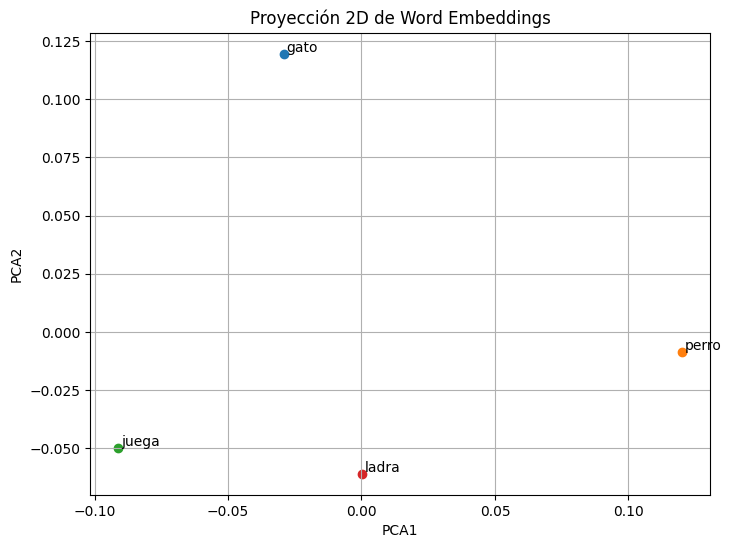

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ['gato', 'perro', 'juega', 'ladra']
vectors = [model.wv[w] for w in words]

# PCA
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    plt.scatter(result[i, 0], result[i, 1])
    plt.text(result[i, 0]+0.001, result[i, 1]+0.001, word)
plt.title("Proyección 2D de Word Embeddings")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()




---

## 🔍 Comparación: One-hot vs Embeddings

| Característica        | One-hot          | Word Embedding      |
| --------------------- | ---------------- | ------------------- |
| Tipo                  | Esparso, binario | Denso, real-valuado |
| Dimensión             | Igual a vocab.   | Típicamente 100-300 |
| Captura semántica     | ❌                | ✅                   |
| Similaridad semántica | ❌                | ✅                   |
| Escalabilidad         | Mala             | Buena               |
| Uso en modelos        | Poco práctico    | Estándar en DL      |

---


# 🔷 C.3 Word2Vec: CBOW y Skip-gram

## 📌 Introducción

**Word2Vec** es una técnica de representación distribuida de palabras propuesta por Mikolov et al. (2013). Introdujo dos arquitecturas fundamentales:

* **CBOW**: predice una palabra dada su ventana de contexto.
* **Skip-gram**: predice el contexto a partir de una palabra central.

Estas técnicas permiten entrenar **word embeddings densos** que capturan propiedades sintácticas y semánticas del lenguaje.

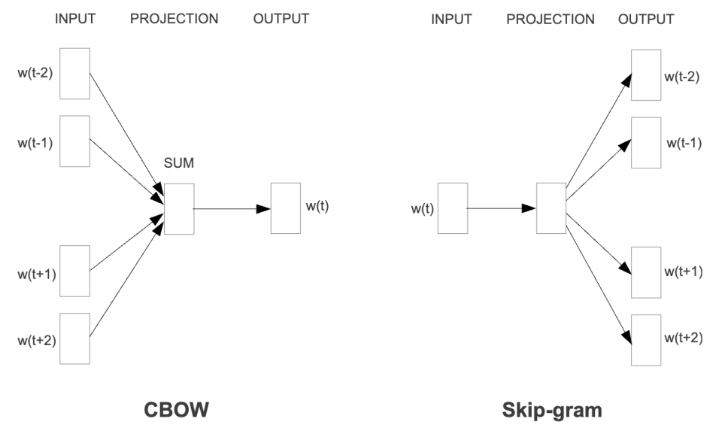

---

## 🧩 Arquitectura CBOW (Continuous Bag of Words)

En **CBOW**, dado un contexto de $2c$ palabras alrededor de una palabra objetivo $w_t$, se entrena un modelo para predecir $w_t$.

$$
P(w_t \mid w_{t-c}, \dots, w_{t-1}, w_{t+1}, \dots, w_{t+c})
$$

### 🧠 Arquitectura:

1. Entrada: vectores one-hot de $2c$ palabras.
2. Promedio de embeddings del contexto.
3. Capa de salida softmax sobre todo el vocabulario.

### 🧮 Fórmula:

Sea $V$ el vocabulario y $\mathbf{W} \in \mathbb{R}^{d \times V}$ la matriz de embeddings.

$$
\mathbf{v}_\text{contexto} = \frac{1}{2c} \sum_{-c \leq j \leq c, j \neq 0} \mathbf{W} \cdot \mathbf{one\_hot}(w_{t+j})
$$

$$
P(w_t \mid \text{contexto}) = \frac{\exp(\mathbf{v}_{w_t}^\top \cdot \mathbf{v}_\text{contexto})}{\sum_{w' \in V} \exp(\mathbf{v}_{w'}^\top \cdot \mathbf{v}_\text{contexto})}
$$





# 🧠 Ejemplo CBOW en NumPy

Este es un ejemplo sencillo para ilustrar el modelo **CBOW** con softmax.

## 📌 Paso 1: Definir vocabulario y embeddings

Tenemos un vocabulario pequeño de 5 palabras:

- el  
- gato  
- duerme  
- en  
- cama  

Y una matriz de embeddings $( W \in \mathbb{R}^{2 \times 5} )$ de dimensión 2:

$$
W=
\begin{bmatrix}
1.0 & 0.5 & -0.5 & 0.3 & 0.1 \\
0.0 & 0.2 & 0.4  & -0.3 & 0.7
\end{bmatrix}
$$

Cada **columna** corresponde al embedding de una palabra.

---

## 📌 Paso 2: Contexto y target

Oración: “… **gato** duerme **en** …”  
- Target: `duerme`  
- Contexto: {`gato`, `en`}  

---

## 📌 Paso 3: Calcular vector de contexto

Promediamos los embeddings de “gato” y “en”:

$$
v_\text{contexto} = \tfrac{1}{2}\big(v_\text{gato} + v_\text{en}\big)
= \tfrac{1}{2}([0.5, 0.2] + [0.3, -0.3])
= [0.4, -0.05]
$$

---

## 📌 Paso 4: Puntajes para cada palabra

Producto punto entre cada embedding y el vector de contexto:

$$
s_w = v_w^\top v_\text{contexto}
$$

- el → 0.400  
- gato → 0.190  
- duerme → -0.220  
- en → 0.135  
- cama → 0.005  

---

## 📌 Paso 5: Softmax

Convertimos los puntajes en probabilidades:

$$
P(w \mid contexto) = \frac{e^{s_w}}{\sum_{u} e^{s_u}}
$$

- P(el | contexto) ≈ 0.264  
- P(gato | contexto) ≈ 0.214  
- P(duerme | contexto) ≈ 0.142  
- P(en | contexto) ≈ 0.203  
- P(cama | contexto) ≈ 0.178  

---

## 📌 Paso 6: Interpretación

El modelo aún no está entrenado, por eso la probabilidad correcta para **“duerme”** es solo **0.142**.  
Durante el entrenamiento, los parámetros de $( W )$ se ajustan para que esa probabilidad aumente.



In [ ]:
import numpy as np

# ===============================
# Mini ejemplo CBOW en NumPy
# ===============================

# Vocabulario
vocab = ["el", "gato", "duerme", "en", "cama"]
V = len(vocab)
d = 2  # dimensión de embeddings

# Matriz de embeddings (columnas = palabras)
W = np.array([
    [1.0,  0.5, -0.5,  0.3,  0.1],
    [0.0,  0.2,  0.4, -0.3,  0.7]
])

# Palabras objetivo y contexto
target_word = "duerme"
context_words = ["gato", "en"]

# Mapear vocabulario a índices
w2i = {w:i for i, w in enumerate(vocab)}

# 1) Embeddings de las palabras de contexto y promedio
context_vecs = [W[:, w2i[w]] for w in context_words]
v_contexto = np.mean(context_vecs, axis=0)

print("Vector de contexto:", v_contexto)

# 2) Puntajes = producto punto con cada palabra del vocabulario
scores = W.T @ v_contexto   # (V,)
print("\nPuntajes (scores):")
for w, s in zip(vocab, scores):
    print(f"{w:>7}: {s:.3f}")

# 3) Softmax para obtener probabilidades
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores)

print("\nProbabilidades (softmax):")
for w, p in zip(vocab, probs):
    print(f"P({w:>7} | contexto) = {p:.3f}")

print("\nProbabilidad correcta para 'duerme':", probs[w2i[target_word]])


Vector de contexto: [ 0.4  -0.05]

Puntajes (scores):
     el: 0.400
   gato: 0.190
 duerme: -0.220
     en: 0.135
   cama: 0.005

Probabilidades (softmax):
P(     el | contexto) = 0.264
P(   gato | contexto) = 0.214
P( duerme | contexto) = 0.142
P(     en | contexto) = 0.202
P(   cama | contexto) = 0.178

Probabilidad correcta para 'duerme': 0.14195977058342515


---

## 🔄 Arquitectura Skip-gram

A diferencia de CBOW, **Skip-gram** trata de predecir el contexto de una palabra central $w_t$.

$$
P(w_{t-c}, \dots, w_{t+c} \mid w_t)
$$

Es decir, maximiza:

$$
\prod_{-c \leq j \leq c, j \neq 0} P(w_{t+j} \mid w_t)
$$

### 🧠 Arquitectura:

1. Entrada: vector one-hot de una sola palabra central.
2. Salida: probabilidad para cada palabra del vocabulario.
3. Optimización: se puede hacer para cada palabra del contexto de forma independiente.

### 🧮 Fórmula:

$$
P(w_o \mid w_i) = \frac{\exp(\mathbf{v}_{w_o}^\top \cdot \mathbf{v}_{w_i})}{\sum_{w' \in V} \exp(\mathbf{v}_{w'}^\top \cdot \mathbf{v}_{w_i})}
$$

donde:

* $w_i$: palabra central.
* $w_o$: palabra de contexto.
* $\mathbf{v}_{w}$: embedding aprendido.

---



## 📌 Ejemplo numérico

- Vocabulario: {el, gato, duerme, en, cama}  
- Dimensión de embeddings: $(d = 2)$  
- Matriz de embeddings (para simplificar, la misma en entrada y salida):

$$
W =
\begin{bmatrix}
1.0 & 0.5 & -0.5 & 0.3 & 0.1 \\
0.0 & 0.2 & \ \ 0.4 & -0.3 & 0.7
\end{bmatrix}
$$

Columnas = {el, gato, duerme, en, cama}.

---

### Ejemplo: “gato **duerme** en”

- Palabra central: **duerme** → vector = $([-0.5, 0.4])$  
- Contexto real: {gato, en}

1. **Puntajes (producto punto)**

- el → -0.50  
- gato → -0.17  
- duerme → 0.41  
- en → -0.27  
- cama → 0.23  

2. **Softmax (probabilidades)**

- P(el | duerme) ≈ 0.122  
- P(gato | duerme) ≈ 0.169 ✅ contexto  
- P(duerme | duerme) ≈ 0.302  
- P(en | duerme) ≈ 0.153 ✅ contexto  
- P(cama | duerme) ≈ 0.253  

3. **Log-verosimilitud del contexto**

$$
\log P(\text{gato}\mid\text{duerme}) + \log P(\text{en}\mid\text{duerme})
\approx -3.659
$$

---


In [ ]:
import numpy as np

# ----- Vocabulario y embeddings -----
vocab = ["el", "gato", "duerme", "en", "cama"]
V = len(vocab)
d = 2

# Para simplicidad, usamos la misma matriz para W_in y W_out
W = np.array([
    [1.0,  0.5, -0.5,  0.3,  0.1],
    [0.0,  0.2,  0.4, -0.3,  0.7]
])  # shape: (d, V)

w2i = {w:i for i,w in enumerate(vocab)}

# ----- Configuración del ejemplo -----
center = "duerme"
context = ["gato", "en"]

v_in_center = W[:, w2i[center]]  # (d,)

# Logits s_w' = (v_out_w')^T v_in_center
scores = W.T @ v_in_center  # (V,)

# Softmax
exp_scores = np.exp(scores - np.max(scores))  # estabilidad numérica
probs = exp_scores / exp_scores.sum()

# Mostrar probabilidades
print("Probabilidades P(w_o | 'duerme'):")
for w, p in zip(vocab, probs):
    print(f"  {w:7s}: {p:.3f}")

# Pérdida (neg log-like) para contexto verdadero
ctx_idx = [w2i[w] for w in context]
loss = -np.sum(np.log(probs[ctx_idx] + 1e-12))
print(f"\nContexto verdadero: {context}")
print(f"Pérdida (neg log-like) = {loss:.4f}")


Probabilidades P(w_o | 'duerme'):
  el     : 0.122
  gato   : 0.169
  duerme : 0.303
  en     : 0.153
  cama   : 0.253

Contexto verdadero: ['gato', 'en']
Pérdida (neg log-like) = 3.6505


## 📏 Comparación entre CBOW y Skip-gram

| Característica | CBOW                      | Skip-gram                  |
| -------------- | ------------------------- | -------------------------- |
| Predice        | Palabra central           | Palabras del contexto      |
| Velocidad      | Más rápido                | Más lento                  |
| Rendimiento    | Bueno para corpus grandes | Bueno para corpus pequeños |
| Palabras raras | Pobre representación      | Mejor rendimiento          |
| Objetivo       | Determinista (promedio)   | Estocástico (por pares)    |

---

## 🎯 Entrenamiento con ventanas de contexto

El parámetro **window** controla el tamaño del contexto $c$. Por ejemplo, con `window=2`, el contexto de `w_t` incluye:

$$
[w_{t-2}, w_{t-1}, w_{t+1}, w_{t+2}]
$$

### 🔧 Implementación:



In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

corpus = [
    # Comer en la casa
    "El perro come en la casa",
    "El gato come en la casa",
    "El niño come en la casa",
    "El señor come en la casa",

    # Dormir en el jardín
    "El perro duerme en el jardín",
    "El gato duerme en el jardín",
    "El niño duerme en el jardín",
    "El señor duerme en el jardín",

    # Jugar en el parque
    "El perro juega en el parque",
    "El gato juega en el parque",
    "El niño juega en el parque",
    "El señor juega en el parque",

    # Correr por el campo
    "El perro corre por el campo",
    "El gato corre por el campo",
    "El niño corre por el campo",
    "El señor corre por el campo",

    # Saltar en la cama
    "El perro salta en la cama",
    "El gato salta en la cama",
    "El niño salta en la cama",
    "El señor salta en la cama",

    # Beber agua en la casa
    "El perro bebe agua en la casa",
    "El gato bebe agua en la casa",
    "El niño bebe agua en la casa",
    "El señor bebe agua en la casa",

    # Mirar al otro
    "El niño mira al gato",
    "El niño mira al perro",
    "El señor mira al gato",
    "El señor mira al perro",

    "El gato mira al niño",
    "El gato mira al señor",
    "El perro mira al niño",
    "El perro mira al señor"
]



tokenized_corpus = [word_tokenize(doc.lower()) for doc in corpus]

# Entrenar modelo Skip-gram
skipgram_model = Word2Vec(sentences=tokenized_corpus, vector_size=10, window=2, min_count=1, sg=1)

# Entrenar modelo CBOW
cbow_model = Word2Vec(sentences=tokenized_corpus, vector_size=10, window=2, min_count=1, sg=0)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


* `sg=1`: Skip-gram
* `sg=0`: CBOW

---

## ⚙️ Técnicas de optimización

### 🔸 1. Negative Sampling

Evita el cálculo de softmax completo (muy costoso para vocabularios grandes). En lugar de calcular la probabilidad sobre todo $V$, se elige un pequeño número $k$ de palabras "negativas".

#### 📐 Función objetivo:

Para cada par positivo $(w_i, w_o)$ y $k$ pares negativos $(w_i, w_{neg})$:

$$
\log \sigma(\mathbf{v}_{w_o}^\top \cdot \mathbf{v}_{w_i}) + \sum_{j=1}^k \mathbb{E}_{w_{neg}} [\log \sigma(-\mathbf{v}_{w_{neg}}^\top \cdot \mathbf{v}_{w_i})]
$$


---

## 🔍 Visualización de embeddings

https://jalammar.github.io/illustrated-word2vec/

### 🔸 Vectores y similitud



In [ ]:
vector_gato = skipgram_model.wv['gato']
similar_words = skipgram_model.wv.most_similar('gato')
print(similar_words)



[('señor', 0.6142504811286926), ('agua', 0.39182791113853455), ('salta', 0.3430858254432678), ('niño', 0.25068002939224243), ('duerme', 0.14338283240795135), ('corre', 0.11130852997303009), ('al', 0.04287023842334747), ('juega', 0.027962833642959595), ('parque', -0.06528641283512115), ('bebe', -0.07879900187253952)]


### 🔸 Analogías vectoriales

In [ ]:
result = skipgram_model.wv.most_similar(positive=['perro', 'come'], negative=['bebe'])
print("Analogy:", result)





Analogy: [('campo', 0.5261618494987488), ('casa', 0.3713880479335785), ('señor', 0.3506588339805603), ('duerme', 0.32427969574928284), ('jardín', 0.3069121837615967), ('por', 0.2900807559490204), ('el', 0.2596660852432251), ('corre', 0.2309991717338562), ('mira', 0.22621291875839233), ('parque', 0.2223101109266281)]


### 🔸 Proyección 2D con PCA

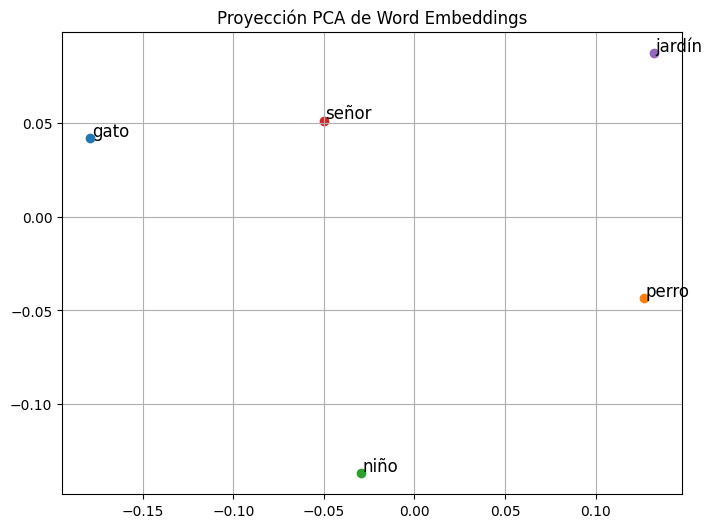

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = ['gato', 'perro', 'niño', 'señor', 'jardín']
vectors = [skipgram_model.wv[w] for w in words]

pca = PCA(n_components=2)
coords = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(coords[i, 0], coords[i, 1])
    plt.text(coords[i, 0]+0.001, coords[i, 1]+0.001, word, fontsize=12)
plt.title("Proyección PCA de Word Embeddings")
plt.grid(True)
plt.show()




---

## 🧪 Observaciones clave

* Word2Vec **no necesita etiquetado**: es un método auto-supervisado.
* Los vectores aprenden **relaciones semánticas y sintácticas**.
* Los embeddings **preentrenados** (como los de Google News o fastText) pueden usarse como insumo para tareas de clasificación, traducción o resumen.
* La estructura geométrica de los embeddings refleja **analogías** y relaciones semánticas.

---



# 🔷 GloVe: Global Vectors for Word Representation

## 📌 Motivación

Aunque **Word2Vec** aprende representaciones de palabras eficaces utilizando **contextos locales**, **no utiliza información estadística global** del corpus. **GloVe** (Pennington, Socher y Manning, 2014) propone una solución que combina la eficiencia de Word2Vec con la solidez de los conteos globales, mejorando la **coherencia semántica de los vectores**.

---

## 🔄 Diferencias entre Word2Vec y GloVe

| Característica        | Word2Vec                    | GloVe                                        |
| --------------------- | --------------------------- | -------------------------------------------- |
| Basado en             | Predicción (contexto local) | Factorización (conteo global)                |
| Información utilizada | Ventanas locales            | Matriz global de coocurrencia                |
| Modelo                | Red neuronal        | Optimización directa de una función objetivo |
| Interpretabilidad     | Menor                       | Mayor                                        |

---

## 🧮 Matriz de coocurrencia global

GloVe comienza construyendo una **matriz de coocurrencia** $X \in \mathbb{R}^{|V| \times |V|}$, donde $X_{ij}$ es el número de veces que la palabra $j$ aparece en el contexto de la palabra $i$.

A partir de esta matriz, se define:

$$
P_{ij} = \frac{X_{ij}}{\sum_k X_{ik}} = \text{probabilidad de que } j \text{ aparezca en el contexto de } i
$$

---

## 🔧 Objetivo de GloVe

Se busca que la diferencia entre embeddings de palabras refleje **proporciones semánticas**. Por ejemplo:

$$
\frac{P_{ik}}{P_{jk}} \approx \frac{X_{ik}}{X_{jk}}
$$

Se define una función objetivo basada en la diferencia logarítmica de los conteos de coocurrencia:

$$
J = \sum_{i,j=1}^{|V|} f(X_{ij}) \left( \mathbf{w}_i^\top \tilde{\mathbf{w}}_j + b_i + \tilde{b}_j - \log X_{ij} \right)^2
$$

* $\mathbf{w}_i$: embedding de la palabra $i$
* $\tilde{\mathbf{w}}_j$: embedding del contexto de la palabra $j$
* $b_i, \tilde{b}_j$: sesgos
* $f(X_{ij})$: función de ponderación

### 📉 Función de ponderación

La función $f(x)$ se define como:

$$
f(x) = \begin{cases}
\left( \frac{x}{x_{\text{max}}} \right)^\alpha & \text{si } x < x_{\text{max}} \\
1 & \text{en otro caso}
\end{cases}
$$

Con valores típicos: $\alpha = 0.75$, $x_{\text{max}} = 100$

---

## 🧠 Interpretación semántica

GloVe busca que **las relaciones semánticas** se expresen como **diferencias vectoriales**:

* $\text{vec}(\text{Rey}) - \text{vec}(\text{Hombre}) + \text{vec}(\text{Mujer}) \approx \text{vec}(\text{Reina})$

Gracias al uso de conteos globales, GloVe logra que vectores similares compartan contexto **a lo largo de todo el corpus**, no sólo en ventanas cercanas.

---

## 🧪 Ejemplo en Python: Cargar embeddings preentrenados de GloVe

### 1. Descargar e importar embeddings



In [ ]:
#!pip install gensim
import numpy as np

import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

print(list(api.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# --- 📌 Descargar el Modelo Word2Vec Preentrenado en Español ---
print("Descargando embeddings preentrenados...")
model = api.load("glove-wiki-gigaword-200")  # Modelo en español de 200 dimensiones

# --- 📌 Verificar Dimensiones del Modelo ---
print(f"\nDimensiones del embedding: {model.vector_size}")  # Debe ser 200
print(f"Número total de palabras en el vocabulario: {len(model.key_to_index)}")



Descargando embeddings preentrenados...
[==================================================] 100.0% 252.1/252.1MB downloaded

Dimensiones del embedding: 200
Número total de palabras en el vocabulario: 400000


In [ ]:
model.word_vec('woman')

/tmp/ipython-input-3355326174.py:1: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  model.word_vec('woman')


array([ 5.2487e-01, -1.1941e-01, -2.0242e-01, -6.2393e-01, -1.5380e-01,
       -6.6337e-02, -3.6850e-01,  2.8649e-02,  1.3795e-01, -5.8782e-01,
        6.0209e-01,  2.6054e-02,  7.0789e-01,  1.2033e-01, -1.7431e-02,
        4.0336e-01, -3.1968e-01, -2.5061e-01,  1.6089e-01,  2.4765e-01,
        7.7936e-01,  2.7407e+00,  1.1959e-01, -2.6753e-01, -3.8281e-01,
       -3.3658e-01,  1.4104e-01, -4.6548e-01, -8.9208e-02,  2.2254e-01,
       -3.6074e-02, -7.1014e-02,  6.2320e-01,  3.2277e-01,  4.1565e-01,
       -3.6853e-02, -5.8286e-01, -6.2651e-01, -3.2617e-02,  2.7479e-01,
       -2.6695e-01,  5.2769e-02, -1.0950e+00, -1.9976e-03, -7.4939e-01,
       -1.9000e-02, -1.8762e-01, -5.1933e-01,  1.7159e-01,  4.4069e-01,
        1.9079e-01, -4.5734e-02, -2.4307e-02,  2.3271e-01,  1.0218e-01,
       -6.0279e-02, -2.6368e-01, -1.4909e-01,  4.3389e-01, -8.5142e-02,
       -6.6142e-01, -6.2338e-02, -1.3792e-01,  4.5408e-01, -1.5140e-01,
        1.1493e-01,  5.4865e-01,  2.8237e-01, -2.5513e-01,  1.11

In [ ]:
# --- 📌 Función para Realizar Aritmética de Palabras ---
def aritmetica_palabras(palabra1, palabra2, palabra3, top = 1):
    try:
        resultado = model.most_similar(positive=[palabra1, palabra3], negative=[palabra2], topn=top)
        #print(resultado)
        print(f"\n{palabra1} - {palabra2} + {palabra3} = {resultado[0][0]} (Similitud: {resultado[0][1]:.4f})")
    except KeyError as e:
        print(f"Error: {e}")

# --- 📌 Ejemplos de Aritmética de Palabras ---
aritmetica_palabras("king", "man", "woman")  # Debería ser "reina"




king - man + woman = queen (Similitud: 0.6979)


In [ ]:
aritmetica_palabras("madrid", "spain", "france")
aritmetica_palabras("gentleman", "man", "woman", top=5)


madrid - spain + france = paris (Similitud: 0.7957)

gentleman - man + woman = ladies (Similitud: 0.5190)


In [ ]:
model.most_similar('senegal', topn=5)

[('gambia', 0.7297487854957581),
 ('mali', 0.720116376876831),
 ('gabon', 0.7091537117958069),
 ('ghana', 0.6818678379058838),
 ('togo', 0.6796621084213257)]

In [ ]:
aritmetica_palabras("adults", "university", "schools")


adults - university + schools = adolescents (Similitud: 0.6462)


## 🔭 Visualización con PCA



In [ ]:
# --- 📌 Seleccionar Palabras ---
palabras_interesantes = ["king", "queen", "prince", "madrid", "spain", "paris", "france", "italy", "rome", "botswana", "tokyo", "japan", "tobago",
                        "car", "bus", "train","cat", "dog", "bogota", "colombia" ]


# Obtener vectores
vectores = np.array([model[word] for word in palabras_interesantes])






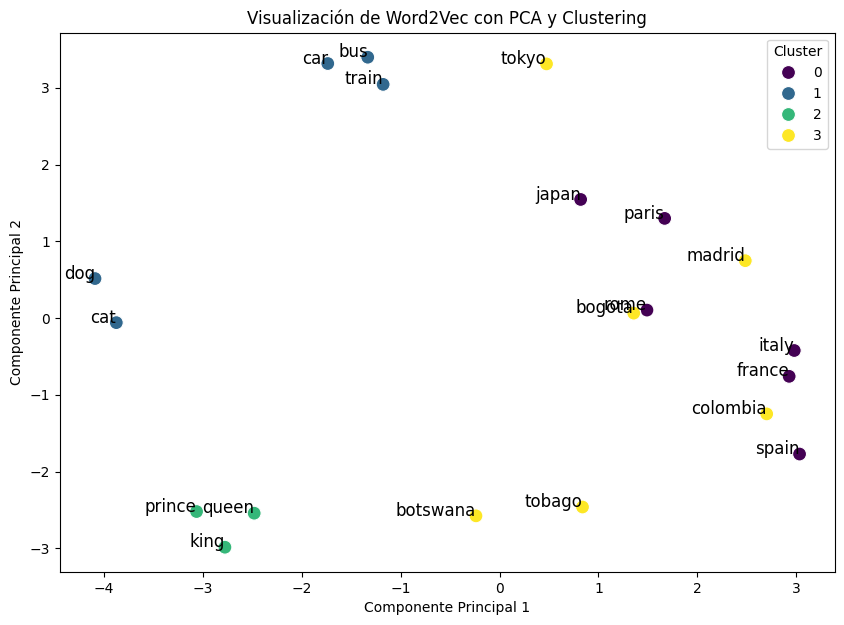

In [ ]:
# --- 📌 Aplicar PCA ---
pca = PCA(n_components=2)
vectores_2d = pca.fit_transform(vectores)

# --- 📌 Aplicar KMeans ---
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(vectores)

# --- 📌 Visualización ---
plt.figure(figsize=(10, 7))
sns.scatterplot(x=vectores_2d[:, 0], y=vectores_2d[:, 1], hue=labels, palette="viridis", s=100)

# Añadir etiquetas
for i, word in enumerate(palabras_interesantes):
    plt.text(vectores_2d[i, 0], vectores_2d[i, 1], word, fontsize=12, ha='right')

plt.title("Visualización de Word2Vec con PCA y Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()


---

## 📚 Conclusiones

* GloVe modela explícitamente las **relaciones globales** de coocurrencia entre palabras.
* Utiliza una **función de pérdida convexa**, lo que facilita su optimización eficiente.
* Produce representaciones semánticas ricas, incluso para **analogías complejas**.
* Puede combinarse con modelos clásicos o redes neuronales como input fijo (embeddings estáticos).

---


# 🔷 Embeddings fuera de vocabulario y soluciones

Uno de los mayores desafíos en los modelos de lenguaje tradicionales basados en palabras completas es cómo manejar palabras **desconocidas o poco frecuentes**, es decir, **fuera de vocabulario (OOV, *Out-Of-Vocabulary*)**.

---

## 🔹 1. Palabras desconocidas (OOV)

### ❓¿Qué es una palabra OOV?

Una palabra OOV es aquella que no fue vista durante el entrenamiento del modelo de embeddings. Esto impide obtener una representación vectorial directamente, lo que puede causar fallos en el procesamiento.

### 📉 Problemas de los modelos clásicos

* `Word2Vec` y `GloVe` no pueden representar palabras no presentes en su vocabulario.
* Los textos con errores tipográficos, neologismos, nombres raros o palabras técnicas suelen generar tokens OOV.

**Ejemplo**:



In [ ]:
print("president" in model)  # True
print("presidentx" in model)  # False


True
False


---

## 🔹 2. Representación por caracteres

Una solución es representar palabras no como unidades completas, sino a partir de sus **caracteres**.

### 🧠 Idea:

* Toda palabra se descompone en caracteres.
* Se usan redes neuronales o modelos tipo RNN/CNN para combinar esos caracteres.

### 📦 Implementaciones:

* Char-CNN (Convolutional Neural Networks sobre caracteres).
* ELMo usa caracteres como entrada.

---

## 🔹 3. Subword embeddings: FastText

**FastText**, desarrollado por Facebook AI, extiende Word2Vec al incorporar **sub-palabras** (n-gramas de caracteres). Esto permite representar palabras no vistas.

### 🔧 ¿Cómo funciona?

* Cada palabra se representa como un conjunto de **n-gramas de caracteres**.
* El embedding de la palabra es la suma o promedio de los vectores de sus subcomponentes.

### 🧮 Fórmula general:

$$
\vec{w} = \frac{1}{|G(w)|} \sum_{g \in G(w)} \vec{g}
$$

Donde:

* $G(w)$: conjunto de n-gramas de la palabra $w$
* $\vec{g}$: vector asociado al n-grama

### 🧪 Ejemplo en Python con `fasttext`:



In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.0-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.0-py3-none-any.whl (292 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4487341 sha256=2d36120016973438a7fa5f896e2c0e09cac94be3cd4a69f5a940af0b96b0d2c4
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import fasttext

# Entrenamiento (opcional, o carga uno preentrenado)
corpus_txt = 'drive/MyDrive/MeIA_2025/corpus.txt'
model_FT = fasttext.train_unsupervised(corpus_txt, model='skipgram')

# Consulta de palabra
print(model_FT.get_word_vector("perro"))  # Vector de 100 dimensiones
print(model_FT.get_word_vector("perro4gato"))  # También funciona



[-1.31381315e-03 -1.85330934e-03  8.92043288e-04  3.95236420e-04
  3.94629518e-04  6.40534039e-04 -1.63647556e-03  1.02996675e-03
 -5.16343396e-04 -8.83262488e-04 -1.34862377e-03 -6.54703123e-04
 -2.06399578e-04 -1.21608807e-03  1.44948310e-04  4.60332871e-04
  5.41268557e-04  2.09121878e-04  2.38222608e-04 -6.83833205e-04
  7.02670659e-04 -8.31721001e-04 -2.34182648e-04 -1.09656787e-04
 -3.44393397e-04  1.25402724e-03  3.56601726e-04  1.44749379e-03
 -4.76421410e-05  1.07433851e-04 -8.41150759e-04 -9.87821491e-04
 -1.34522765e-04 -6.71343587e-04  1.99622882e-04  2.66307325e-04
  3.25747853e-04  7.23151607e-04 -4.93727384e-06 -2.22537012e-04
 -9.30814247e-04 -7.74699030e-04  1.15686504e-04 -9.19089885e-04
 -5.09540725e-04 -3.46241344e-04  1.03381975e-03 -2.29862751e-04
  8.19100358e-04 -1.73792825e-03  4.57301445e-04 -1.13526406e-03
  4.21012432e-04 -5.91773773e-04 -5.29835743e-05  9.36926153e-05
  1.51512714e-03 -2.31141763e-04  1.50127773e-04  2.06862853e-04
  9.42412589e-04  2.48263

📌 *Incluso una palabra inventada tiene representación si sus n-gramas fueron vistos.*

---

## 🔹 4. Byte Pair Encoding (BPE)

### 🧠 ¿Qué es BPE?

Es una técnica de **segmentación basada en frecuencias**, originalmente usada para compresión, adaptada al PLN para tokenización robusta.

### ⚙️ Funcionamiento:

1. Inicialmente cada palabra se representa como una secuencia de caracteres.
2. Iterativamente se combinan los pares de caracteres (o subpalabras) más frecuentes.
3. Se construye un **vocabulario de subunidades óptimo**.

### ✨ Ventaja:

* Maneja palabras raras dividiéndolas en fragmentos comunes.
* Permite vocabularios más pequeños con mayor cobertura.

### 🧪 Ejemplo con `tokenizers` (HuggingFace):



In [ ]:
from tokenizers import Tokenizer, models, pre_tokenizers, trainers

tokenizer = Tokenizer(models.BPE())
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
trainer = trainers.BpeTrainer(vocab_size=1000)

corpus = ["El gato duerme tranquilo", "Desinformación masiva en redes"]
tokenizer.train_from_iterator(corpus, trainer)

print(tokenizer.encode("desinformación").tokens)
# Ejemplo de salida: ['des', 'información']




['des', 'in', 'forma', 'ción']


---

## 🔹 5. Tokenización y vocabularios dinámicos

Las técnicas modernas (como BPE, WordPiece y SentencePiece) permiten que el **vocabulario se adapte** a corpus más amplios o personalizados.

### 📚 Ejemplos de tokenizadores:

* **WordPiece** → usado por BERT.
* **SentencePiece** → usado por T5, mBART, GPT-J.
* **Byte-Level BPE** → usado por GPT-2 y GPT-3.

### 🧪 Código: Tokenización tipo BERT



In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
tokens = tokenizer.tokenize("Desinformación tecnológica")
print(tokens)




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

['Des', '##in', '##forma', '##ción', 'te', '##c', '##nol', '##ógica']


💡 El prefijo `##` indica fragmento unido a una raíz anterior.

---

## 📌 Conclusiones

* Los embeddings clásicos fallan ante OOVs, especialmente en dominios abiertos.
* FastText y BPE solucionan el problema mediante subpalabras.
* Tokenización basada en unidades subléxicas permite modelos más robustos y generalizables.
* Hoy en día, todos los modelos modernos utilizan alguna forma de **tokenización dinámica**.

---


# 🔷 Embeddings contextuales (introducción conceptual)

A medida que las tareas de Procesamiento de Lenguaje Natural (PLN) se han vuelto más complejas, surgió la necesidad de contar con representaciones más **contextuales** del lenguaje. Esta sección introduce el salto conceptual de los **embeddings estáticos** hacia los **embeddings dinámicos o contextuales**, como los generados por modelos tipo ELMo o BERT.

---

## 🔹 1. Embeddings estáticos vs contextuales

| Característica             | Embeddings estáticos (Word2Vec, GloVe)                   | Embeddings contextuales (ELMo, BERT) |
| -------------------------- | -------------------------------------------------------- | ------------------------------------ |
| Representación por palabra | Única, fija para cada palabra                            | Variable según el contexto           |
| Tamaño del vocabulario     | Limitado, fijo                                           | Más flexible (tokenización dinámica) |
| Tratamiento del contexto   | No se considera                                          | Se modela explícitamente             |
| Ejemplo de “banco”         | Mismo vector para “banco de dinero” y “banco del parque” | Vectores distintos según el uso      |

---

## 🔹 2. Limitaciones de Word2Vec y GloVe

Los modelos como **Word2Vec** o **GloVe** representan cada palabra con un solo vector, sin importar dónde o cómo se usa:



In [ ]:
print(model["bank"])  # Mismo vector para todos los contextos

[ 7.2956e-01  3.5777e-01  5.5383e-01 -3.5752e-01 -3.2615e-01  3.6247e-01
  2.9063e-01 -6.3978e-01 -1.7506e-01  1.5504e-01  1.0415e-01 -5.1271e-01
  9.3202e-01 -1.2262e-01  9.8649e-01 -1.2122e-01  3.3762e-01 -3.9356e-01
  1.5375e-01 -7.9463e-01 -1.1161e+00  2.9704e+00  2.9807e-02 -7.2030e-01
 -9.1919e-01 -2.2316e-01 -1.4792e-01  3.2724e-01 -3.7910e-01 -3.8252e-04
 -6.1861e-02 -1.9998e-01 -3.7516e-01 -3.1042e-01 -3.4928e-01  2.6917e-01
 -1.2687e+00 -4.0969e-01 -4.6101e-01 -2.1521e-02  1.7466e-01 -1.6865e-01
 -3.5862e-02  8.2123e-01 -1.5955e-01  3.1934e-01  2.1998e-01  3.3535e-01
 -5.6627e-02 -1.5819e-01 -3.5589e-01  1.4230e-01  6.2255e-01 -4.9974e-01
 -8.3606e-02 -2.6989e-01 -8.9952e-01 -4.6342e-02  3.2022e-02  1.0327e-01
  3.3622e-01  2.0475e-01 -6.2853e-01  4.4842e-01  3.5278e-01 -1.9815e-01
  6.4779e-01  5.8458e-01 -9.4399e-01  6.8133e-01  4.8901e-01 -9.8351e-02
  5.3331e-02  6.3175e-01  4.1265e-01  1.8172e+00  3.1897e-01  5.9285e-01
  7.1838e-01 -3.3949e-01 -3.5445e-01 -2.2761e-01  2

### ❌ Problemas:

* Ambigüedad léxica no resuelta.
* No distingue entre significados múltiples ("banco", "pico", "ratón").
* No captura relaciones a largo plazo en la oración.

---

## 🔹 3. Motivación para embeddings dinámicos

El objetivo es que **una palabra adquiera diferente representación** dependiendo del contexto en el que aparece:

> 📌 *"You shall know a word by the company it keeps"*

### ✅ Ejemplos:

* “El **banco** aprobó el préstamo.” → sentido financiero
* “Nos sentamos en el **banco** del parque.” → sentido físico

Un modelo contextual debería capturar estas diferencias.

---

## 🔹 4. Primer paso: ELMo

**ELMo (Embeddings from Language Models)** fue el primer gran modelo en generar representaciones **contextualizadas** mediante una arquitectura basada en LSTM bidireccionales.

### 🧠 Arquitectura:

* Usa una red LSTM entrenada como modelo de lenguaje bidireccional.
* Combina representaciones de múltiples capas (word-level + context).

### 🧮 Fórmula básica:

$$
\text{ELMo}_k = \gamma \sum_{j=0}^{L} s_j \cdot h_{k,j}
$$

* $h_{k,j}$: representación de la palabra $k$ en la capa $j$
* $s_j$: ponderaciones aprendibles por capa
* $\gamma$: escalar de ajuste

---

## 🔹 5. Anticipando a BERT y Transformers

### 📍BERT (Bidirectional Encoder Representations from Transformers)

* Entrenado con **Masked Language Modeling**, lo cual le permite entender el contexto **a izquierda y derecha** de una palabra.
* Utiliza **autoatención** (self-attention), no secuencias recurrentes como LSTM.

### ⚠️ A diferencia de ELMo:

* BERT entrena de forma más paralelizable.
* No requiere recorrer la oración palabra por palabra.
* Permite obtener embeddings **tokenizados y contextualizados**.

---

## 🔸 Ejemplo comparativo ilustrativo

```text
Frase 1: "El banco está cerrado por reformas."
Frase 2: "Caminamos hasta el banco junto al lago."
```

| Modelo   | banco (F1)              | banco (F2)               |
| -------- | ----------------------- | ------------------------ |
| Word2Vec | \[0.23, -0.54, 0.31, …] | \[0.23, -0.54, 0.31, …]  |
| ELMo     | \[0.12, 0.05, -0.87, …] | \[0.67, -0.34, 0.11, …]  |
| BERT     | \[0.19, -0.12, 0.45, …] | \[0.71, -0.43, -0.05, …] |

🧠 *Se observa cómo los embeddings contextuales son sensibles a la oración completa.*

---

## 🔹 6. Beneficios de los embeddings contextuales

* 📈 Mejoran en casi todas las tareas de PLN.
* 🧠 Capturan ambigüedad y relaciones semánticas complejas.
* 💡 Son base para tareas como respuesta a preguntas, inferencia, análisis de sentimientos, etc.

---

